<a href="https://colab.research.google.com/github/ctk03272/deeplearningstudy/blob/main/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. 학습 관련 기술들
## 6.1 매개 변수 갱신
- 신경망 학습의 목적은 손실 함수의 값을 가능한 낮추는 매개변수를 찾는 것 -> 최적화라고 함
- 미분을 이용하는게 SGD 이고, 이 외의 기법도 있ㅇㅁ
### 6.1.1 모험가 이야기
### 6.1.2 확률적 경사 하강법
- W ← W - η * ∂L/∂W


In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### 6.1.3. SGD의 단점
- 비등방성함수(방향에 따라 성질이 달라지는 함수) 에서는 탐색 경로가 비효율적이다.

### 6.1.4 모멘텀
- v ← αv - η * ∂L/∂W
- W ← W + v
- 모멘텀은 공이 그릇의 곡면을 따라 구르듯 움직인다.
- SGD와 비교하면 지그재그 정도가 덜하다

In [ ]:

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

### 6.1.5 AdaGrad
- 신경망 학습에서는 학습률 값이 중요하다.
- 이 학습률을 정하는 기술로 학습률 감소가 있다.
- 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행한다.
- h ← h + ∂L/∂W ⊙ ∂L/∂W
- W ← W - η *1/√h * ∂L/∂W

In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}

            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

### 6.1.6 Adam
- 모멘텀과 AdaGrad를 융합
- 하이퍼 파리미터의 편향 보정이 진행된다

In [ ]:
class Adam:
    '''
    Adam (http://arxiv.org/abs/1412.6980v8)
    '''
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))

        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for i in range(len(params)):
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])
            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])

            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)

### 6.1.7 어느 갱신 방법을 이용할 것인가?
- 각자의 장단점이 있다.

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교
- 일반적으로는 SGD보다 다른 세 기법이 빠르게 학습하고, 떄로는 최종 정확도도 높게 나타난다.

## 6.2 가중치의 초깃값
- 신경망 학습에서 중요한 것이 가중치의 초깃값이다.

### 6.2.1 초깃값을 0으로 하면?
- 가중치 감소 기법 -> 가중치 매개변수 값이 작아지도록 하여 오버피팅이 일어나지 않게 한다.
- 가중치를 작게 하고 싶다면 초깃값도 최대한 작은 값에서 시작하는것이 정공 법이지만, 가중치의 초깂값을 0으로 설정하면 올바른 학습이 이루어지지 않는다.
- 정확히는 가중치를 균일한 값으로 설정 해서는 안된다. -> 가중치가 고르게 되어버리는 상황을 막으려면 초깃값을 무작위로 설정해야 한다.

### 6.2.2 은닉층의 활성화값 분포

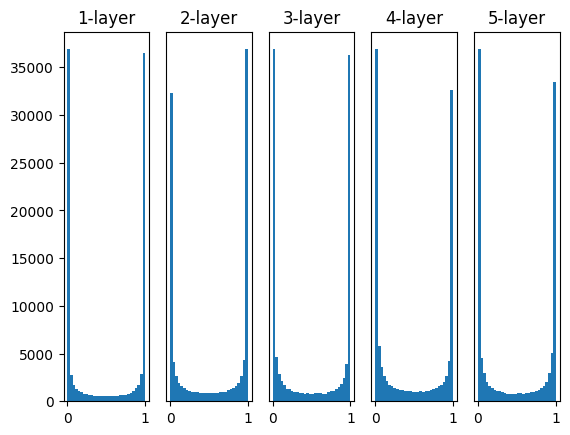

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

- 여기에서 사용한 시그모이드 함수는 그 출력이 0 또는 1에 가까워지자 그 미분은 0이 다가갑니다.
- 데이터가 0과 1에 치우쳐 분포하면 역전파의 기울기 값이 점점 작아지다가 사라진다. -> 기울기 소실

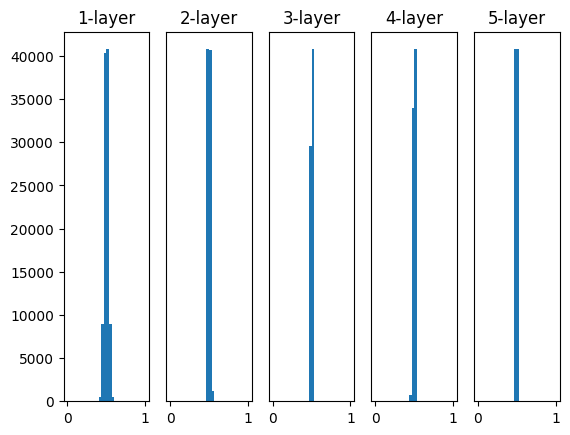

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

- 다수의 뉴런이 거의 같은 값을 출력하여, 뉴런을 여러개 둔 의미가 없다.
- 표현력을 제한한다는 관점에서 문제가 된다.
- Xavier 초깃값 -> 일반적인 딥러닝 프레임워크들이 표준적으로 이용한다.-> 초깃값의 표준편차가 1/루트n 이 되도록 설정 -> 앞 츠에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼진다.

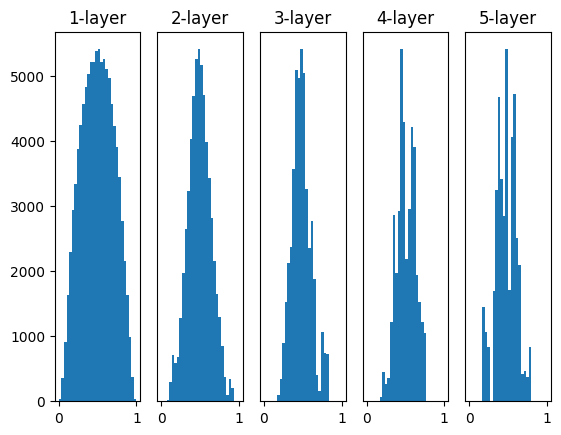

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)


input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0:
        plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0, 1))

plt.show()

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값
- ReLU를 이용할 때에는 ReLU에 특화된 초깃값이 필요 -> He 초깃값

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교
- 가중치의 초깃값에 따라 신경만 학습의 성패가 갈리기 때문에 중요하다

## 6.3 배치 정규화
- 각 층이 활성화를 적당히 퍼뜨리도록 강제해보자

### 6.3.1 배치 정규화 알고리즘
- 학습을 빨리 진행할 수 있음
- 초깃값에 크게 의존하지 않는다
- 오버피팅을 억제한다

### 6.3.2 배치 정규화의 효과

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
============== 1/16 ==============
epoch:0 | 0.093 - 0.113


/content/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.125
epoch:2 | 0.097 - 0.132
epoch:3 | 0.097 - 0.143
epoch:4 | 0.097 - 0.158
epoch:5 | 0.097 - 0.192
epoch:6 | 0.097 - 0.214
epoch:7 | 0.097 - 0.225
epoch:8 | 0.097 - 0.255
epoch:9 | 0.097 - 0.276
epoch:10 | 0.097 - 0.295
epoch:11 | 0.097 - 0.313
epoch:12 | 0.097 - 0.338
epoch:13 | 0.097 - 0.339
epoch:14 | 0.097 - 0.357
epoch:15 | 0.097 - 0.385
epoch:16 | 0.097 - 0.397
epoch:17 | 0.097 - 0.405
epoch:18 | 0.097 - 0.423
epoch:19 | 0.097 - 0.444


============== 2/16 ==============
epoch:0 | 0.097 - 0.099


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


epoch:1 | 0.097 - 0.105
epoch:2 | 0.097 - 0.096
epoch:3 | 0.097 - 0.099
epoch:4 | 0.097 - 0.124
epoch:5 | 0.097 - 0.157
epoch:6 | 0.097 - 0.18
epoch:7 | 0.097 - 0.204
epoch:8 | 0.097 - 0.233
epoch:9 | 0.097 - 0.25
epoch:10 | 0.097 - 0.285
epoch:11 | 0.097 - 0.293
epoch:12 | 0.097 - 0.316
epoch:13 | 0.097 - 0.337
epoch:14 | 0.097 - 0.353
epoch:15 | 0.097 - 0.371
epoch:16 | 0.097 - 0.399
epoch:17 | 0.097 - 0.411
epoch:18 | 0.097 - 0.443


epoch:19 | 0.097 - 0.446
============== 3/16 ==============
epoch:0 | 0.094 - 0.076
epoch:1 | 0.435 - 0.102
epoch:2 | 0.559 - 0.135
epoch:3 | 0.647 - 0.168
epoch:4 | 0.748 - 0.194
epoch:5 | 0.781 - 0.234
epoch:6 | 0.812 - 0.266
epoch:7 | 0.877 - 0.293
epoch:8 | 0.913 - 0.339
epoch:9 | 0.919 - 0.376
epoch:10 | 0.94 - 0.394
epoch:11 | 0.948 - 0.417
epoch:12 | 0.96 - 0.45
epoch:13 | 0.971 - 0.466
epoch:14 | 0.974 - 0.489
epoch:15 | 0.978 - 0.505
epoch:16 | 0.982 - 0.532
epoch:17 | 0.983 - 0.546
epoch:18 | 0.986 - 0.572


epoch:19 | 0.99 - 0.589
============== 4/16 ==============
epoch:0 | 0.107 - 0.09
epoch:1 | 0.312 - 0.111
epoch:2 | 0.456 - 0.191
epoch:3 | 0.572 - 0.253
epoch:4 | 0.642 - 0.322
epoch:5 | 0.667 - 0.371
epoch:6 | 0.703 - 0.423
epoch:7 | 0.73 - 0.461
epoch:8 | 0.769 - 0.49
epoch:9 | 0.784 - 0.541
epoch:10 | 0.795 - 0.57
epoch:11 | 0.82 - 0.604
epoch:12 | 0.827 - 0.632
epoch:13 | 0.822 - 0.661
epoch:14 | 0.847 - 0.675
epoch:15 | 0.862 - 0.694
epoch:16 | 0.869 - 0.716
epoch:17 | 0.871 - 0.741
epoch:18 | 0.886 - 0.767


epoch:19 | 0.891 - 0.771
============== 5/16 ==============
epoch:0 | 0.172 - 0.122
epoch:1 | 0.176 - 0.138
epoch:2 | 0.179 - 0.289
epoch:3 | 0.181 - 0.461
epoch:4 | 0.185 - 0.589
epoch:5 | 0.192 - 0.66
epoch:6 | 0.187 - 0.711
epoch:7 | 0.185 - 0.73
epoch:8 | 0.184 - 0.758
epoch:9 | 0.188 - 0.772
epoch:10 | 0.19 - 0.787
epoch:11 | 0.202 - 0.804
epoch:12 | 0.222 - 0.824
epoch:13 | 0.236 - 0.838
epoch:14 | 0.245 - 0.838
epoch:15 | 0.262 - 0.85
epoch:16 | 0.27 - 0.858
epoch:17 | 0.281 - 0.879
epoch:18 | 0.301 - 0.884


epoch:19 | 0.311 - 0.889
============== 6/16 ==============
epoch:0 | 0.087 - 0.099
epoch:1 | 0.096 - 0.194
epoch:2 | 0.142 - 0.412
epoch:3 | 0.12 - 0.565
epoch:4 | 0.142 - 0.648
epoch:5 | 0.155 - 0.711
epoch:6 | 0.157 - 0.758
epoch:7 | 0.141 - 0.795
epoch:8 | 0.176 - 0.835
epoch:9 | 0.151 - 0.85
epoch:10 | 0.155 - 0.867
epoch:11 | 0.119 - 0.88
epoch:12 | 0.118 - 0.895
epoch:13 | 0.135 - 0.907
epoch:14 | 0.185 - 0.921
epoch:15 | 0.181 - 0.923
epoch:16 | 0.192 - 0.933
epoch:17 | 0.161 - 0.943
epoch:18 | 0.179 - 0.951


epoch:19 | 0.195 - 0.951
============== 7/16 ==============
epoch:0 | 0.097 - 0.135
epoch:1 | 0.117 - 0.308
epoch:2 | 0.116 - 0.584
epoch:3 | 0.116 - 0.709
epoch:4 | 0.117 - 0.746
epoch:5 | 0.117 - 0.765
epoch:6 | 0.116 - 0.801
epoch:7 | 0.116 - 0.826
epoch:8 | 0.116 - 0.857
epoch:9 | 0.116 - 0.886
epoch:10 | 0.116 - 0.909
epoch:11 | 0.116 - 0.93
epoch:12 | 0.116 - 0.942
epoch:13 | 0.116 - 0.954
epoch:14 | 0.117 - 0.965
epoch:15 | 0.117 - 0.972
epoch:16 | 0.117 - 0.976
epoch:17 | 0.117 - 0.975
epoch:18 | 0.117 - 0.981


epoch:19 | 0.117 - 0.983
============== 8/16 ==============
epoch:0 | 0.1 - 0.087
epoch:1 | 0.117 - 0.451
epoch:2 | 0.117 - 0.736
epoch:3 | 0.117 - 0.826
epoch:4 | 0.117 - 0.883
epoch:5 | 0.117 - 0.912
epoch:6 | 0.117 - 0.928
epoch:7 | 0.117 - 0.955
epoch:8 | 0.117 - 0.967
epoch:9 | 0.117 - 0.972
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.985
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.993
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.994
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.997
epoch:19 | 0.117 - 0.998


============== 9/16 ==============
epoch:0 | 0.105 - 0.098
epoch:1 | 0.117 - 0.281
epoch:2 | 0.117 - 0.707
epoch:3 | 0.117 - 0.783
epoch:4 | 0.117 - 0.885
epoch:5 | 0.117 - 0.925
epoch:6 | 0.117 - 0.97
epoch:7 | 0.117 - 0.963
epoch:8 | 0.117 - 0.983
epoch:9 | 0.117 - 0.988
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.999
epoch:19 | 0.116 - 1.0


============== 10/16 ==============
epoch:0 | 0.117 - 0.102
epoch:1 | 0.117 - 0.574
epoch:2 | 0.117 - 0.794
epoch:3 | 0.117 - 0.88
epoch:4 | 0.117 - 0.917
epoch:5 | 0.117 - 0.94
epoch:6 | 0.117 - 0.958
epoch:7 | 0.117 - 0.978
epoch:8 | 0.117 - 0.94
epoch:9 | 0.117 - 0.989
epoch:10 | 0.117 - 0.997
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 1.0


epoch:19 | 0.117 - 0.994
============== 11/16 ==============
epoch:0 | 0.117 - 0.199
epoch:1 | 0.105 - 0.618
epoch:2 | 0.117 - 0.657
epoch:3 | 0.117 - 0.681
epoch:4 | 0.117 - 0.688
epoch:5 | 0.117 - 0.72
epoch:6 | 0.117 - 0.759
epoch:7 | 0.117 - 0.762
epoch:8 | 0.117 - 0.774
epoch:9 | 0.117 - 0.77
epoch:10 | 0.117 - 0.783
epoch:11 | 0.117 - 0.779
epoch:12 | 0.117 - 0.783
epoch:13 | 0.117 - 0.781
epoch:14 | 0.117 - 0.793
epoch:15 | 0.117 - 0.799
epoch:16 | 0.117 - 0.802
epoch:17 | 0.117 - 0.804
epoch:18 | 0.117 - 0.894


epoch:19 | 0.117 - 0.895
============== 12/16 ==============
epoch:0 | 0.094 - 0.17
epoch:1 | 0.117 - 0.487
epoch:2 | 0.117 - 0.617
epoch:3 | 0.117 - 0.7
epoch:4 | 0.117 - 0.577
epoch:5 | 0.117 - 0.717
epoch:6 | 0.117 - 0.747
epoch:7 | 0.117 - 0.791
epoch:8 | 0.117 - 0.771
epoch:9 | 0.116 - 0.807
epoch:10 | 0.117 - 0.852
epoch:11 | 0.117 - 0.822
epoch:12 | 0.117 - 0.802
epoch:13 | 0.117 - 0.841
epoch:14 | 0.117 - 0.863
epoch:15 | 0.117 - 0.866
epoch:16 | 0.117 - 0.882
epoch:17 | 0.117 - 0.893
epoch:18 | 0.117 - 0.882
epoch:19 | 0.117 - 0.921


============== 13/16 ==============
epoch:0 | 0.117 - 0.244
epoch:1 | 0.117 - 0.367
epoch:2 | 0.105 - 0.384
epoch:3 | 0.105 - 0.459
epoch:4 | 0.105 - 0.415
epoch:5 | 0.116 - 0.498
epoch:6 | 0.116 - 0.514
epoch:7 | 0.116 - 0.507
epoch:8 | 0.116 - 0.516
epoch:9 | 0.117 - 0.493
epoch:10 | 0.117 - 0.52
epoch:11 | 0.117 - 0.522
epoch:12 | 0.117 - 0.522
epoch:13 | 0.117 - 0.52
epoch:14 | 0.117 - 0.522
epoch:15 | 0.116 - 0.522
epoch:16 | 0.116 - 0.522
epoch:17 | 0.116 - 0.522
epoch:18 | 0.116 - 0.522


epoch:19 | 0.116 - 0.522
============== 14/16 ==============
epoch:0 | 0.105 - 0.138
epoch:1 | 0.117 - 0.409
epoch:2 | 0.117 - 0.479
epoch:3 | 0.117 - 0.504
epoch:4 | 0.117 - 0.501
epoch:5 | 0.117 - 0.506
epoch:6 | 0.117 - 0.483
epoch:7 | 0.117 - 0.513
epoch:8 | 0.117 - 0.514
epoch:9 | 0.117 - 0.519
epoch:10 | 0.117 - 0.519
epoch:11 | 0.116 - 0.52
epoch:12 | 0.116 - 0.527
epoch:13 | 0.116 - 0.537
epoch:14 | 0.116 - 0.536
epoch:15 | 0.116 - 0.595
epoch:16 | 0.116 - 0.599
epoch:17 | 0.116 - 0.677
epoch:18 | 0.116 - 0.694


epoch:19 | 0.116 - 0.687
============== 15/16 ==============
epoch:0 | 0.117 - 0.143
epoch:1 | 0.116 - 0.418
epoch:2 | 0.116 - 0.388
epoch:3 | 0.116 - 0.41
epoch:4 | 0.117 - 0.424
epoch:5 | 0.116 - 0.421
epoch:6 | 0.117 - 0.489
epoch:7 | 0.117 - 0.507
epoch:8 | 0.117 - 0.504
epoch:9 | 0.117 - 0.508
epoch:10 | 0.117 - 0.526
epoch:11 | 0.117 - 0.519
epoch:12 | 0.117 - 0.527
epoch:13 | 0.117 - 0.522
epoch:14 | 0.117 - 0.528
epoch:15 | 0.117 - 0.527
epoch:16 | 0.117 - 0.528
epoch:17 | 0.117 - 0.528
epoch:18 | 0.117 - 0.528


epoch:19 | 0.117 - 0.529
============== 16/16 ==============
epoch:0 | 0.117 - 0.189
epoch:1 | 0.117 - 0.286
epoch:2 | 0.117 - 0.382
epoch:3 | 0.117 - 0.448
epoch:4 | 0.117 - 0.503
epoch:5 | 0.117 - 0.49
epoch:6 | 0.117 - 0.496
epoch:7 | 0.117 - 0.516
epoch:8 | 0.117 - 0.507
epoch:9 | 0.117 - 0.518
epoch:10 | 0.117 - 0.511
epoch:11 | 0.117 - 0.517
epoch:12 | 0.117 - 0.526
epoch:13 | 0.117 - 0.519
epoch:14 | 0.117 - 0.526
epoch:15 | 0.117 - 0.393
epoch:16 | 0.117 - 0.524
epoch:17 | 0.117 - 0.526
epoch:18 | 0.117 - 0.527
epoch:19 | 0.117 - 0.525


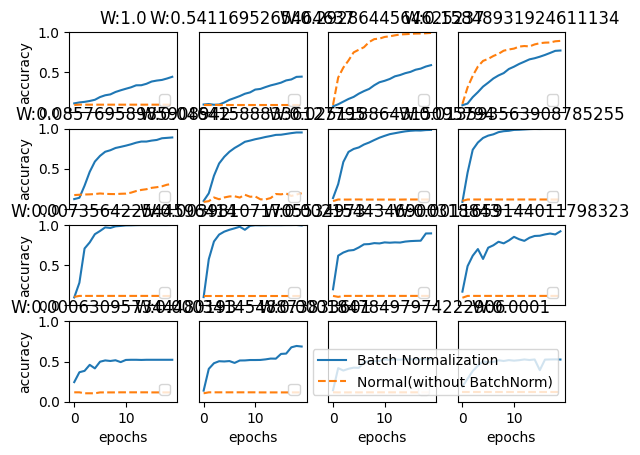

In [ ]:
# coding: utf-8
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784,
                                     hidden_size_list=[100, 100, 100, 100, 100],
                                     output_size=10,
                                     weight_init_std=weight_init_std,
                                     use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784,
                                  hidden_size_list=[100, 100, 100, 100, 100],
                                  output_size=10,
                                  weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - "
                  + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print("============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4, 4, i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list,
                 label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle="--",
                 label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

- 많은 경우 배치 정규화를 사용할 때 학습 진도가 빠르다

## 6.4 바른 학습을 위해
- 오버피팅이 문제가 되는 일이 많다 -> 오버피팅이란 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태를 말한다.

### 6.4.1 오버피팅
- 오버피팅은 다음과 같은 두 경우 일어남
  - 매개 변수가 많고 표현력이 높은 모델
  - 훈련 데이터가 적음

epoch:0, train acc:0.06666666666666667, test acc:0.0629
epoch:1, train acc:0.09333333333333334, test acc:0.0725
epoch:2, train acc:0.12, test acc:0.0944
epoch:3, train acc:0.15333333333333332, test acc:0.1161
epoch:4, train acc:0.17333333333333334, test acc:0.1327
epoch:5, train acc:0.21, test acc:0.1526
epoch:6, train acc:0.24, test acc:0.169
epoch:7, train acc:0.25, test acc:0.1936
epoch:8, train acc:0.26666666666666666, test acc:0.2115
epoch:9, train acc:0.30666666666666664, test acc:0.2327
epoch:10, train acc:0.3433333333333333, test acc:0.2505
epoch:11, train acc:0.37666666666666665, test acc:0.2669
epoch:12, train acc:0.41, test acc:0.2874
epoch:13, train acc:0.43333333333333335, test acc:0.3048
epoch:14, train acc:0.45666666666666667, test acc:0.322
epoch:15, train acc:0.47, test acc:0.3394
epoch:16, train acc:0.5, test acc:0.3535
epoch:17, train acc:0.5233333333333333, test acc:0.362
epoch:18, train acc:0.5333333333333333, test acc:0.3703
epoch:19, train acc:0.55, test acc:0.39

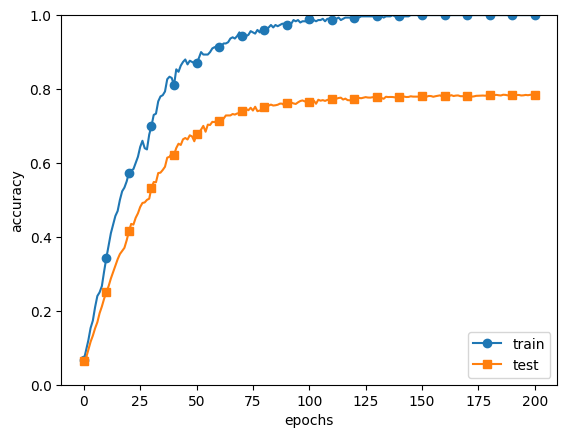

In [ ]:
# coding: utf-8
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
# weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 정확도가 크게 벌어지는 것은 훈련데이터에만 적응해버린 결과이다.

### 6.4.2
- 오버피팅 억제에 많이 이용한 방법은 가중치감소이다.

epoch:0, train acc:0.11333333333333333, test acc:0.0996
epoch:1, train acc:0.12, test acc:0.1042
epoch:2, train acc:0.13666666666666666, test acc:0.1123
epoch:3, train acc:0.14333333333333334, test acc:0.115
epoch:4, train acc:0.18, test acc:0.1206
epoch:5, train acc:0.18, test acc:0.1249
epoch:6, train acc:0.19333333333333333, test acc:0.1306
epoch:7, train acc:0.2, test acc:0.1346
epoch:8, train acc:0.21333333333333335, test acc:0.1421
epoch:9, train acc:0.22666666666666666, test acc:0.1551
epoch:10, train acc:0.23333333333333334, test acc:0.1582
epoch:11, train acc:0.23, test acc:0.1526
epoch:12, train acc:0.24, test acc:0.1581
epoch:13, train acc:0.25, test acc:0.1659
epoch:14, train acc:0.24333333333333335, test acc:0.1708
epoch:15, train acc:0.24666666666666667, test acc:0.1761
epoch:16, train acc:0.25, test acc:0.1771
epoch:17, train acc:0.24666666666666667, test acc:0.1813
epoch:18, train acc:0.25666666666666665, test acc:0.1904
epoch:19, train acc:0.2633333333333333, test acc:

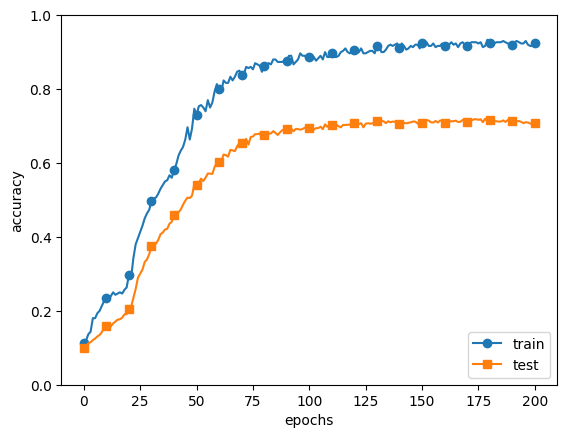

In [ ]:
# coding: utf-8
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 데이터에 대한 정확도에는 여전히 차이가 있지만 차이가 줄었다.
- 추가적으로 정확도가 1.0에 도달하지 못함

### 6.4.3 드롭아웃
- 뉴런을 임의로 삭제하면서 학습하는 방법

train loss:2.308289801213165
=== epoch:1, train acc:0.07666666666666666, test acc:0.0941 ===
train loss:2.303393966234273
train loss:2.3116110846575713
train loss:2.3024325620624277
=== epoch:2, train acc:0.08333333333333333, test acc:0.0997 ===
train loss:2.3085197319325466
train loss:2.3142559570858174
train loss:2.3102524748674016
=== epoch:3, train acc:0.09, test acc:0.1022 ===
train loss:2.3007069864009746
train loss:2.306482935587561
train loss:2.3086761824974915
=== epoch:4, train acc:0.09, test acc:0.1056 ===
train loss:2.305977779782242
train loss:2.3076115764844114
train loss:2.3078570691497746
=== epoch:5, train acc:0.08666666666666667, test acc:0.1061 ===
train loss:2.2982810013540043
train loss:2.3119387227496158
train loss:2.3082494984718007
=== epoch:6, train acc:0.10666666666666667, test acc:0.1086 ===
train loss:2.3033576613716025
train loss:2.3083289941218856
train loss:2.303531446142413
=== epoch:7, train acc:0.12, test acc:0.112 ===
train loss:2.3028823191911436
tra

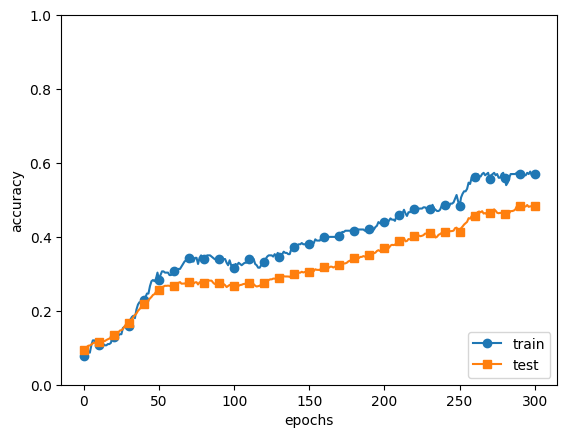

In [2]:
# coding: utf-8
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784,
                              hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout,
                              dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
# epoch:301, train acc:0.73, test acc:0.6315

## 6.5 적절한 하이퍼파라미터 값 찾기

### 6.5.1 검증 데이터
- 하이퍼파라미터의 성능을 평가할 떄는 시험 데이터를 사용해서는 안 된다.-> 하이퍼파라미터 값이 시험 데이터에 오버피팅 될 수 있다.
- 하이퍼파라미터 전용 확인 데이터가 필요 하고 이를 검증 데이터라고 한다.

### 6.5.2 하이퍼파리미터 최적화
- 핵심은 하이퍼파리미터의 '최적 값'이 존재하는 범위를 조금씩 줄여간다는 것이다.
- 하이퍼 파리미터 최적화에 세련된 방법에는 베이즈 최적화가 있다.

### 6.5.3 하이퍼파라미터 최적화 구현하기

val acc:0.1 | lr:5.327962969245816e-05, weight decay:1.7846334909226643e-06
val acc:0.07 | lr:4.7025081130926616e-06, weight decay:1.1685678793491002e-05
val acc:0.15 | lr:0.00014758724245426963, weight decay:4.536892975451326e-05
val acc:0.72 | lr:0.006064655253678086, weight decay:4.316769482229234e-07
val acc:0.16 | lr:2.9702309591970344e-06, weight decay:3.9573347367496574e-08
val acc:0.78 | lr:0.008143888699055142, weight decay:1.2160675893803734e-08
val acc:0.14 | lr:0.0004714334959425293, weight decay:8.6771232204987e-05
val acc:0.2 | lr:4.1921665934829635e-06, weight decay:7.030755990774108e-08
val acc:0.19 | lr:0.0005163504867976359, weight decay:6.085379627713281e-07
val acc:0.11 | lr:0.0001025072687265667, weight decay:3.3888525153959023e-07
val acc:0.49 | lr:0.002805347370246062, weight decay:4.375540563055404e-08
val acc:0.1 | lr:3.13855162009884e-06, weight decay:7.587666905452845e-06
val acc:0.21 | lr:0.0014558183282413, weight decay:1.8199408422625536e-07
val acc:0.1 | 

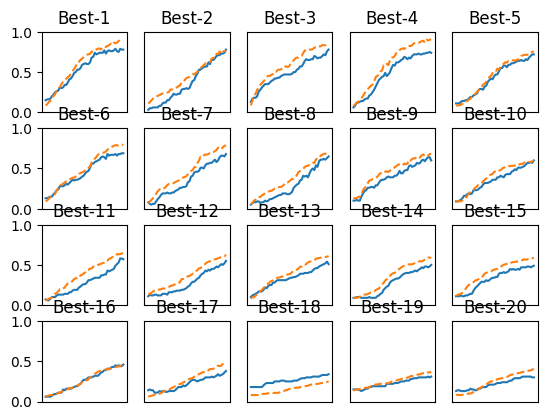

In [3]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()